<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [2]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [3]:
movies.shape


(979, 6)

#### Check the data type of each column.

In [4]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [5]:
movies["duration"].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [6]:
print ("The longest movies = \n", movies.sort_values(by='duration', ascending=False).head(1))
print ("The shortest movies = \n", movies.sort_values(by='duration', ascending=False).tail(1))


The longest movies = 
      star_rating   title content_rating  genre  duration  \
476          7.8  Hamlet          PG-13  Drama       242   

                                           actors_list  
476  [u'Kenneth Branagh', u'Julie Christie', u'Dere...  
The shortest movies = 
      star_rating   title content_rating  genre  duration  \
389          8.0  Freaks        UNRATED  Drama        64   

                                           actors_list  
389  [u'Wallace Ford', u'Leila Hyams', u'Olga Bacla...  


#### Create a histogram of duration, choosing an "appropriate" number of bins.

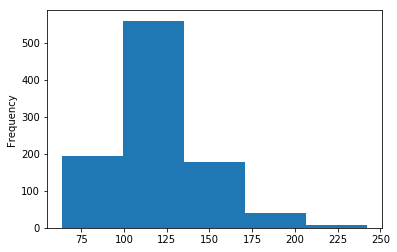

In [7]:
movies.duration.plot.hist(by='duration',bins=5)


#### Use a box plot to display that same data.

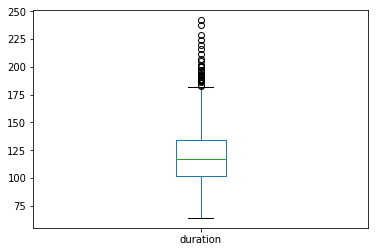

In [8]:
movies.duration.plot(kind='box')


## Intermediate level

#### Count how many movies have each of the content ratings.

In [9]:
movies.groupby('content_rating').count()

,star_rating,title,genre,duration,actors_list
content_rating,,,,,
APPROVED,47,47,47,47,47
G,32,32,32,32,32
GP,3,3,3,3,3
NC-17,7,7,7,7,7
NOT RATED,65,65,65,65,65
PASSED,7,7,7,7,7
PG,123,123,123,123,123
PG-13,189,189,189,189,189
R,460,460,460,460,460


#### Use a visualization to display that same data, including a title and x and y labels.

Text(0.5,0,'Content Rating')

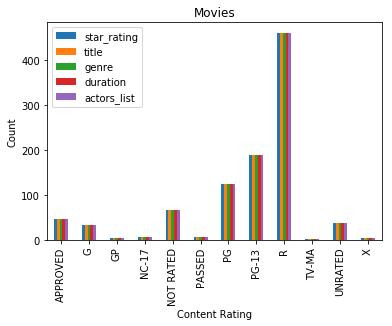

In [10]:
df2 = movies.groupby('content_rating').count().plot(kind='bar',title='Movies')
#movies.sort_values(by='content_rating', ascending=False)
df2.set_ylabel("Count")
df2.set_xlabel("Content Rating")

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [11]:

df = movies.copy()
for x in ["APPROVED", "NOT RATED","GP","PASSED"]:
    df['content_rating']=df['content_rating'].replace({x :"UNRATED"})

    
df1 = pd.pivot_table(df, columns=['content_rating'])
print (df1)



content_rating           G       NC-17          PG       PG-13           R  \
duration        112.343750  119.857143  115.300813  127.195767  122.163043   
star_rating       7.990625    7.614286    7.879675    7.828571    7.854783   

content_rating  TV-MA   UNRATED        X  
duration        131.0  116.4750  106.250  
star_rating       8.1    8.0625    7.925  


#### Convert the following content ratings to "NC-17": X, TV-MA.

In [12]:

df1 = df.copy()
for item in ["TV-MA","X"]:
    df1['content_rating']=df1['content_rating'].replace({item :"NC-17"})
df2 = pd.pivot_table(df1, columns=['content_rating'])
print (df2)

content_rating           G       NC-17          PG       PG-13           R  \
duration        112.343750  116.250000  115.300813  127.195767  122.163043   
star_rating       7.990625    7.758333    7.879675    7.828571    7.854783   

content_rating   UNRATED  
duration        116.4750  
star_rating       8.0625  


#### Count the number of missing values in each column.

In [13]:
print ('the movies : \n')
movies.isnull().sum()


the movies : 



star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [14]:
df3 = movies.copy()
print ('\nThe original  dataframe is as follows : \n' )
print (df3.isnull().sum())
df3[df3["title"]=="Butch Cassidy and the Sundance Kid"]
#print (df3[df3["title"]=="Butch Cassidy and the Sundance Kid"])

df3["content_rating"].fillna("UNRATED", inplace=True)

print ('\nAfter replacing the NaN , the dataframe is as follows : \n' )
print (df3.isnull().sum())
#print (df3[df3["title"]=="Butch Cassidy and the Sundance Kid"])


The original  dataframe is as follows : 

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

After replacing the NaN , the dataframe is as follows : 

star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64


#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [15]:
df3.dtypes
df3[df3['duration']>=120].mean(axis=0)

print ('average star rating for movies 2 hours or longer = \n ')
df4 = df3[df3['duration']>=120].mean(axis=0)
print (df4) 
df5 = df3[df3['duration']<120].mean(axis=0)
print ('average star rating for movies <2 hours  = \n ')
print (df3[df3['duration']<120].mean(axis=0)) 

average star rating for movies 2 hours or longer = 
 
star_rating      7.948899
duration       142.458150
dtype: float64
average star rating for movies <2 hours  = 
 
star_rating      7.838667
duration       102.405714
dtype: float64


#### Use a visualization to detect whether there is a relationship between duration and star rating.

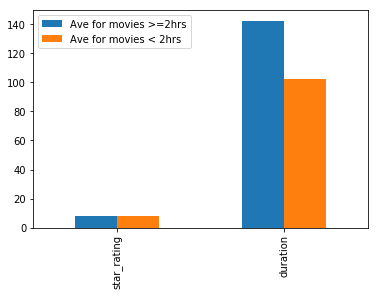

In [16]:

df6 = pd.concat([ df4,df5],axis=1,keys=['Ave for movies >=2hrs','Ave for movies < 2hrs'])
df6.plot.bar()


#### Calculate the average duration for each genre.

In [17]:
print (df3.mean(axis=0)) 
print (df3.groupby(['genre']).mean())

star_rating      7.889785
duration       120.979571
dtype: float64
           star_rating    duration
genre                             
Action        7.884559  126.485294
Adventure     7.933333  134.840000
Animation     7.914516   96.596774
Biography     7.862338  131.844156
Comedy        7.822436  107.602564
Crime         7.916935  122.298387
Drama         7.902518  126.539568
Family        7.850000  107.500000
Fantasy       7.700000  112.000000
Film-Noir     8.033333   97.333333
History       8.000000   66.000000
Horror        7.806897  102.517241
Mystery       7.975000  115.625000
Sci-Fi        7.920000  109.000000
Thriller      7.680000  114.200000
Western       8.255556  136.666667


## Advanced level

#### Visualize the relationship between content rating and duration.

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

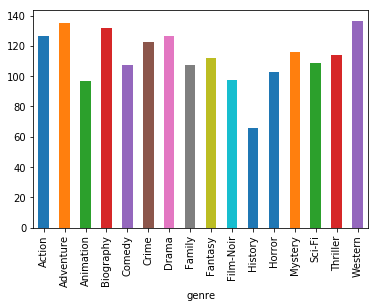

In [18]:
df3.groupby('genre').duration.mean().plot.bar()
df3.groupby('genre').duration.mean()

#### Determine the top rated movie (by star rating) for each genre.

In [19]:
df = movies.copy()
df.sort_values('star_rating',ascending=False).drop_duplicates(['genre'])


,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
39,8.6,Psycho,R,Horror,109,"[u'Anthony Perkins', u'Janet Leigh', u'Vera Mi..."
38,8.6,Rear Window,APPROVED,Mystery,112,"[u'James Stewart', u'Grace Kelly', u'Wendell C..."
35,8.6,Modern Times,G,Comedy,87,"[u'Charles Chaplin', u'Paulette Goddard', u'He..."
30,8.6,Spirited Away,PG,Animation,125,"[u'Daveigh Chase', u'Suzanne Pleshette', u'Miy..."


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [20]:
print ('There are duplicates with the same title \n')
df[df.duplicated(['title'],keep=False)]


#pd.concat(x for _, x in df.groupby("title") if len(x) > 1)



There are duplicates with the same title 



,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,APPROVED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [21]:
# there are no duplicate
print ('There are no duplicates as the actors ,star_rating and duration are different : \n',df[df.duplicated(keep=False)])
  

There are no duplicates as the actors ,star_rating and duration are different : 
 Empty DataFrame
Columns: [star_rating, title, content_rating, genre, duration, actors_list]
Index: []



#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [22]:
movies.genre.value_counts
df7 = movies.groupby('genre').filter(lambda x: x['genre'].value_counts()>10)
print (df7.groupby('genre').mean())


           star_rating    duration
genre                             
Action        7.884559  126.485294
Adventure     7.933333  134.840000
Animation     7.914516   96.596774
Biography     7.862338  131.844156
Comedy        7.822436  107.602564
Crime         7.916935  122.298387
Drama         7.902518  126.539568
Horror        7.806897  102.517241
Mystery       7.975000  115.625000


#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [23]:
# Answer:

#### Option 4: aggregate by count and mean, then filter using the count

In [26]:
grouped = movies.groupby(["genre"], as_index=False).aggregate({"star_rating":["mean" ,"count"]}) 
grouped.columns = ["_".join(x) for x in grouped.columns.ravel()]
print (grouped[(grouped.star_rating_count>10)])

       genre_  star_rating_mean  star_rating_count
0      Action          7.884559                136
1   Adventure          7.933333                 75
2   Animation          7.914516                 62
3   Biography          7.862338                 77
4      Comedy          7.822436                156
5       Crime          7.916935                124
6       Drama          7.902518                278
11     Horror          7.806897                 29
12    Mystery          7.975000                 16


## Bonus

#### Figure out something "interesting" using the actors data!